In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# **IRIS DATASET**

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [48]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [49]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [50]:
X = df.drop(['species'], axis=1)
y = df['species']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
classifier = DecisionTreeClassifier(random_state=1)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid search
grid = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Confusion Matrix
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        10
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



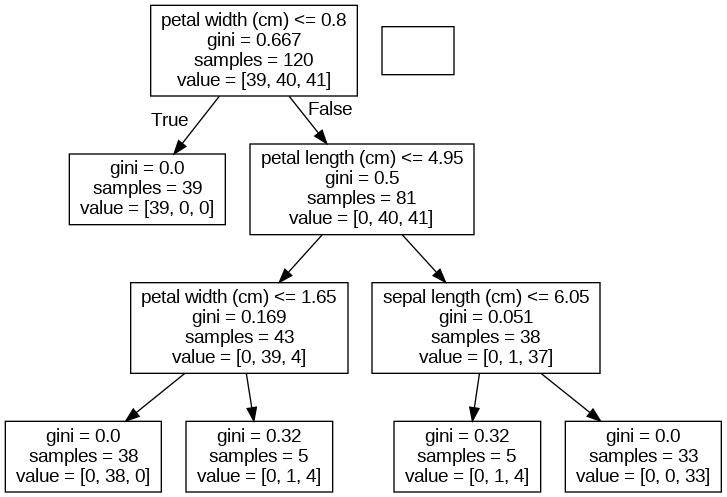

In [53]:
# Plotting of decision tree
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus


features = X.columns
dot_data = export_graphviz(best_model, out_file=None, feature_names=iris.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# **# Wisconsin Breast Cancer Dataset**

In [29]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [30]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['target_label'] = df['target'].map({0: 'malignant', 1: 'benign'})

In [31]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [32]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [34]:
X = df.drop(['target', 'target_label'], axis=1)
y = df['target']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
classifier = DecisionTreeClassifier(random_state=1)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid search
grid = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}

Confusion Matrix
[[35  0]
 [ 7 72]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

   malignant       0.83      1.00      0.91        35
      benign       1.00      0.91      0.95        79

    accuracy                           0.94       114
   macro avg       0.92      0.96      0.93       114
weighted avg       0.95      0.94      0.94       114



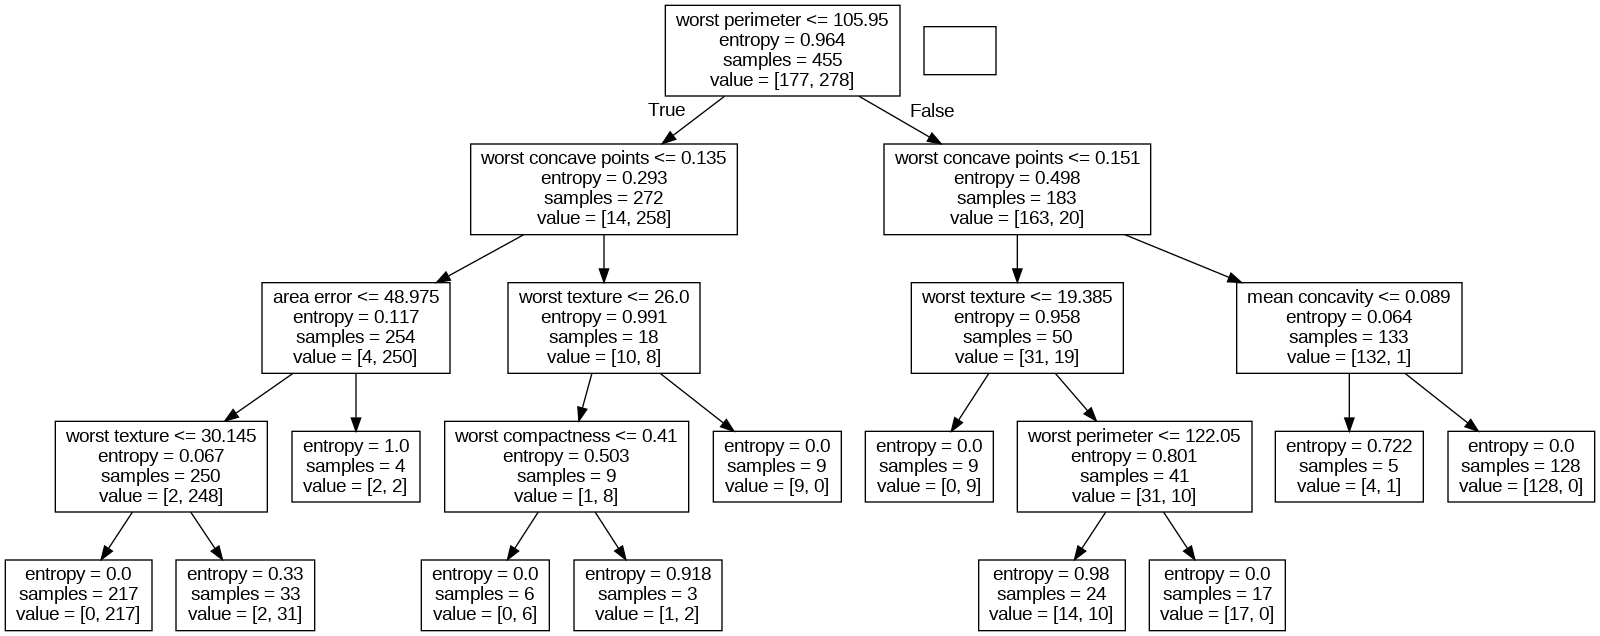

In [41]:
# Plotting of decision tree
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus


features = X.columns
dot_data = export_graphviz(best_model, out_file=None, feature_names=data.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())